# Bayesian pooled polling charts

## Set-up

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import pymc as pm

In [2]:
# local import
import bayes_tools
import plotting
from common import VOTING_INTENTION
from data_capture import retrieve

In [3]:
MODEL_DIR = "../model-images/"
Path(MODEL_DIR).mkdir(parents=True, exist_ok=True)

plt.style.use("fivethirtyeight")
SHOW = True

## Get data

In [4]:
data = retrieve()
assert data  # check we got something

## Do the Bayesian pooling ...

In [5]:
df = plotting.amalgamate_other(data[VOTING_INTENTION])
frame = ("2pp", "Primary vote")
columns = sorted([x for x in df.columns if any(item in x for item in frame)])
to_chart = ("ALP", "L/NP", "GRN", "Other")
chart = [c for c in columns if any(item in c for item in to_chart)]

Series: 2pp vote ALP
Number of polls: 66
Number of days: 492
Number of pollsters: 8
Centre offset: -55.36176516091085



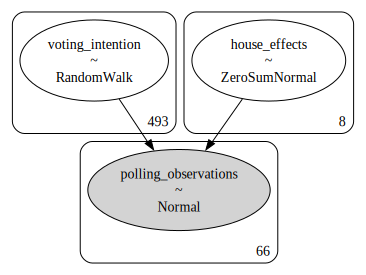

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 47 seconds.


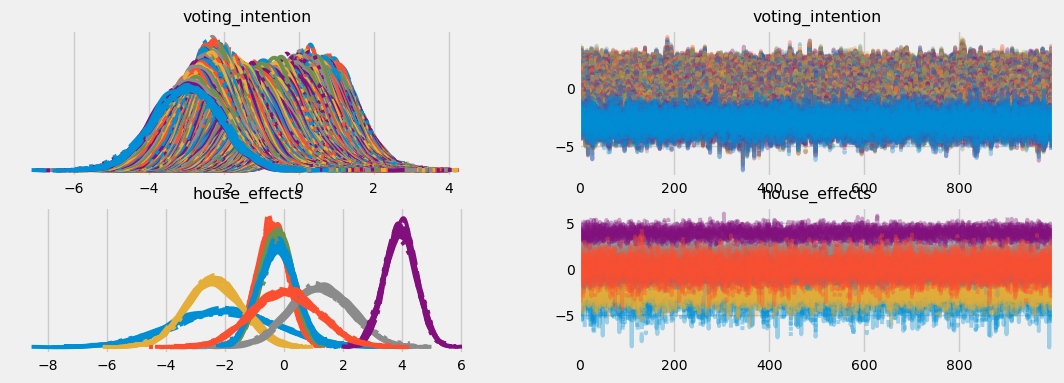

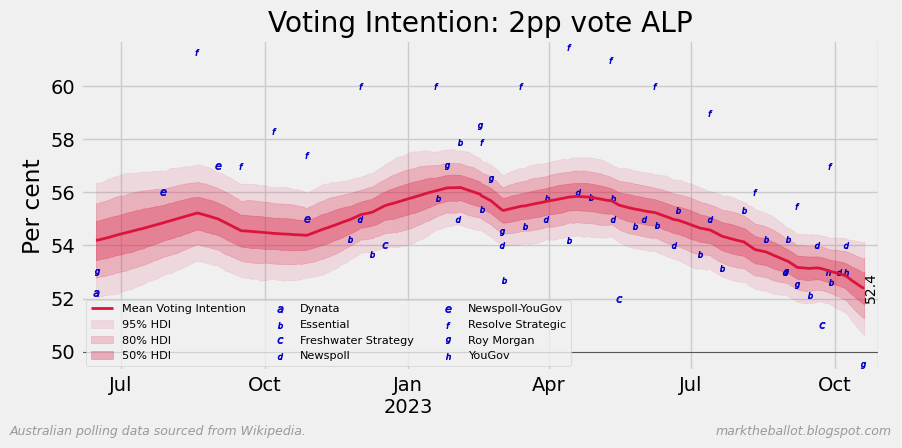

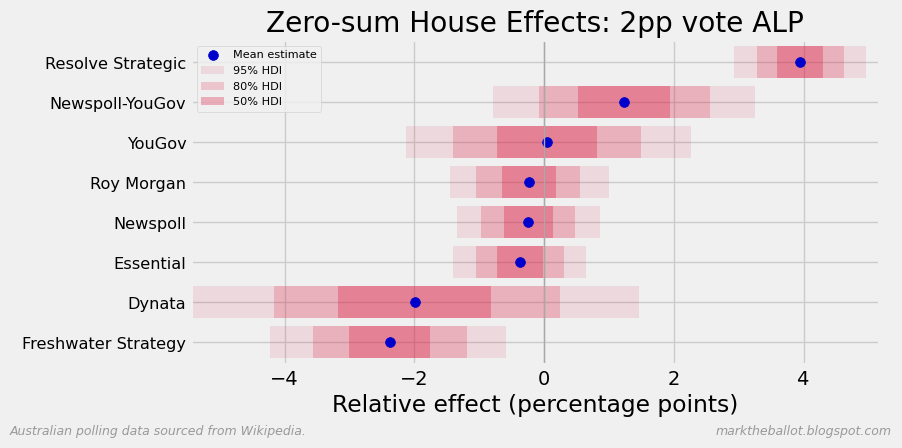

Series: 2pp vote L/NP
Number of polls: 66
Number of days: 492
Number of pollsters: 8
Centre offset: -44.623083323937635



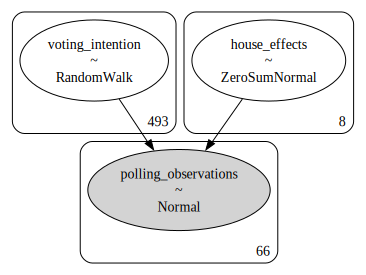

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 47 seconds.


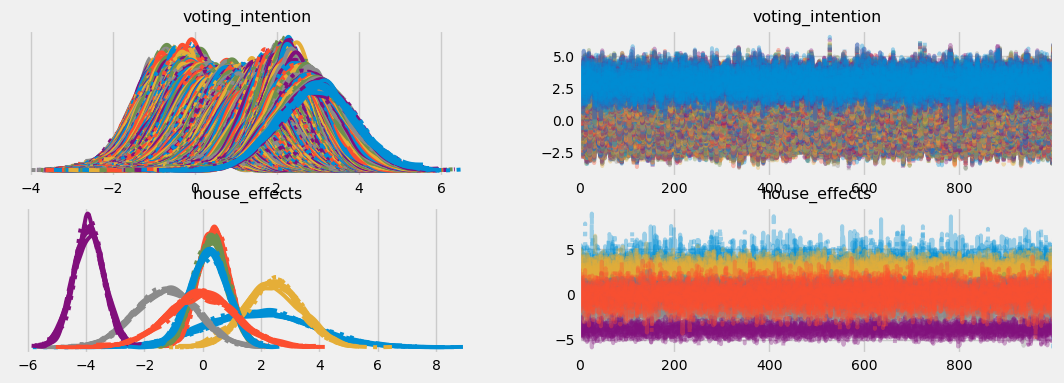

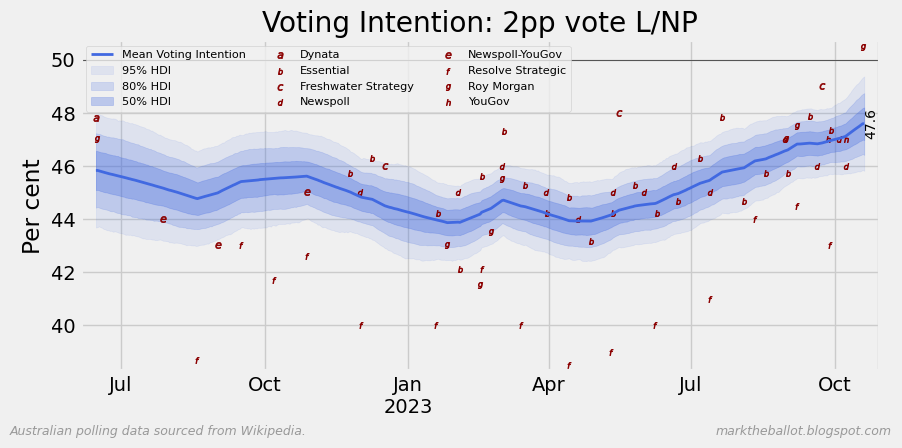

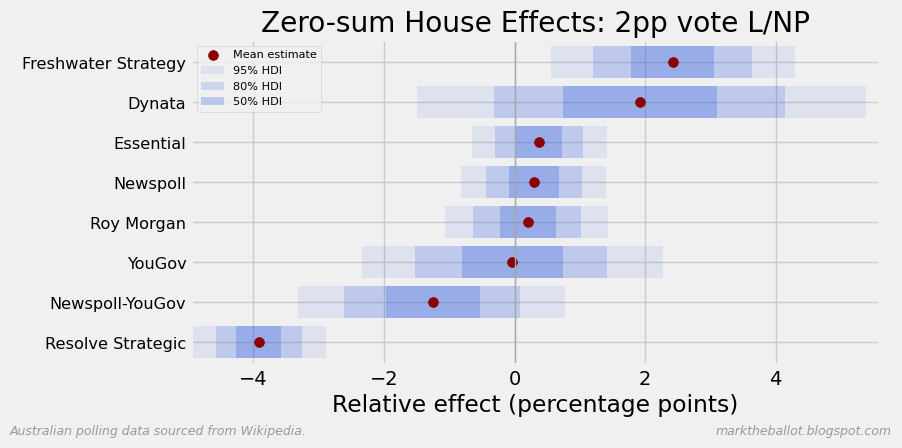

Series: Primary vote ALP
Number of polls: 66
Number of days: 492
Number of pollsters: 8
Centre offset: -36.50449566917842



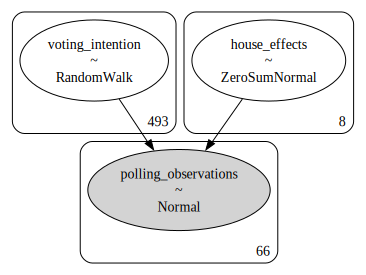

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 48 seconds.


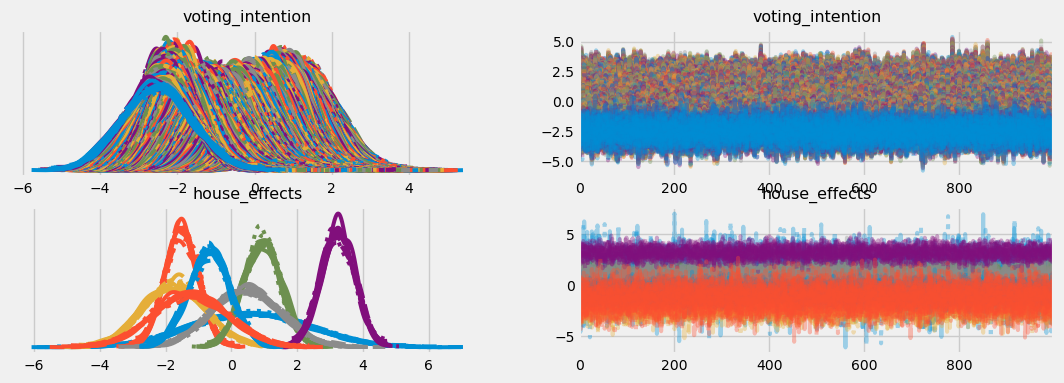

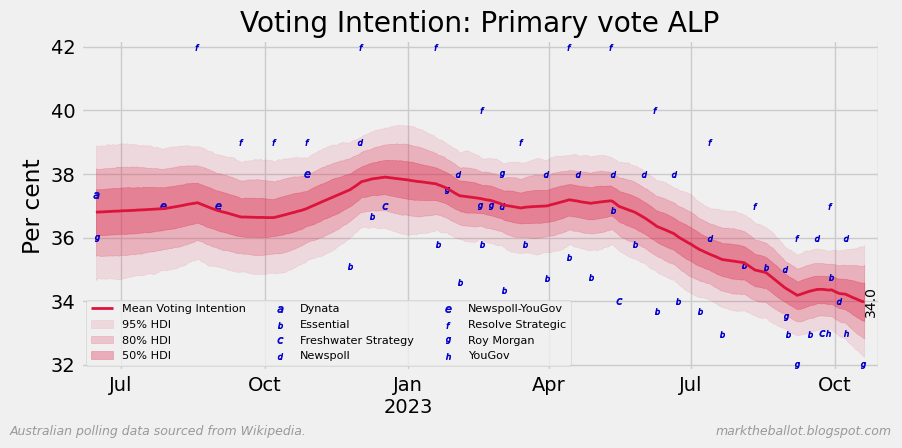

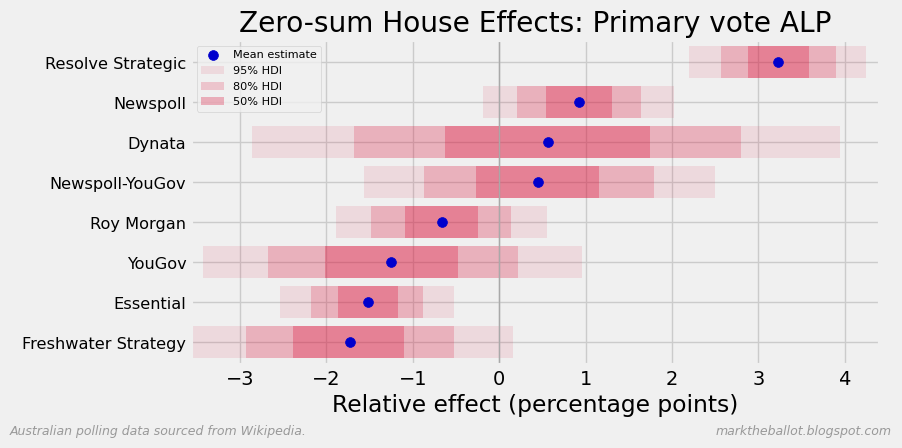

Series: Primary vote GRN
Number of polls: 66
Number of days: 492
Number of pollsters: 8
Centre offset: -12.827913608282516



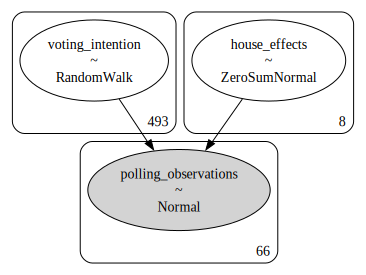

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 48 seconds.


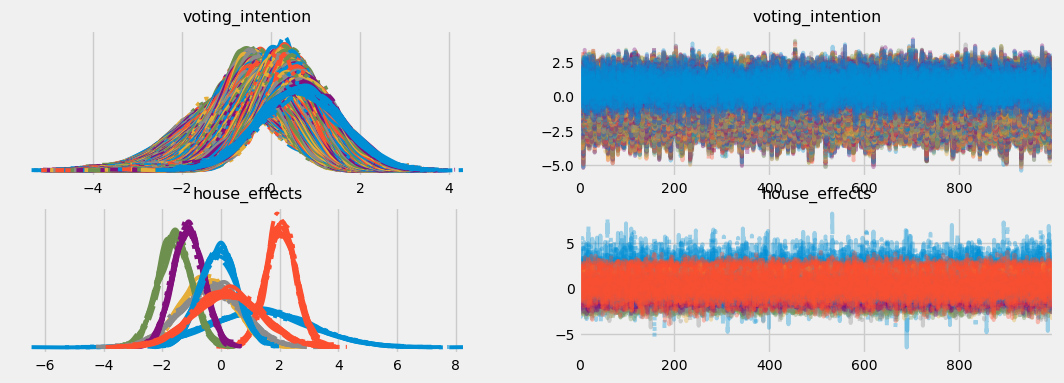

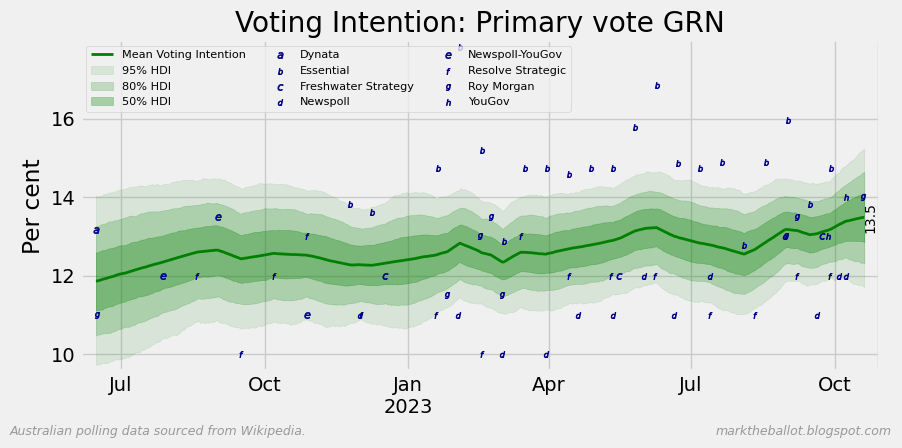

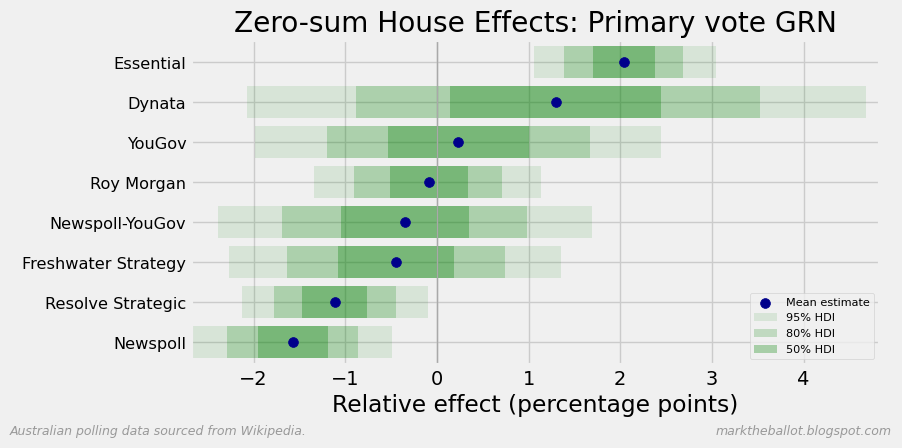

Series: Primary vote L/NP
Number of polls: 66
Number of days: 492
Number of pollsters: 8
Centre offset: -33.318656295355275



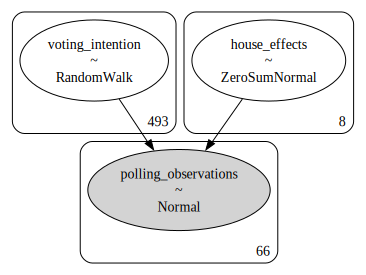

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 48 seconds.


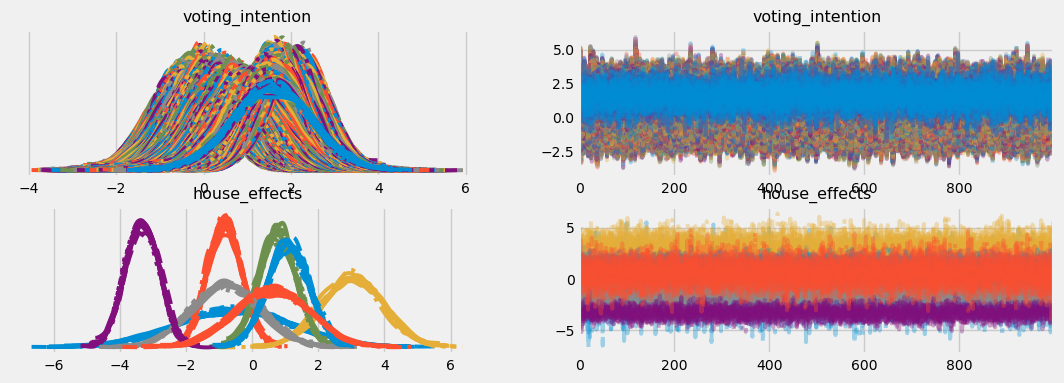

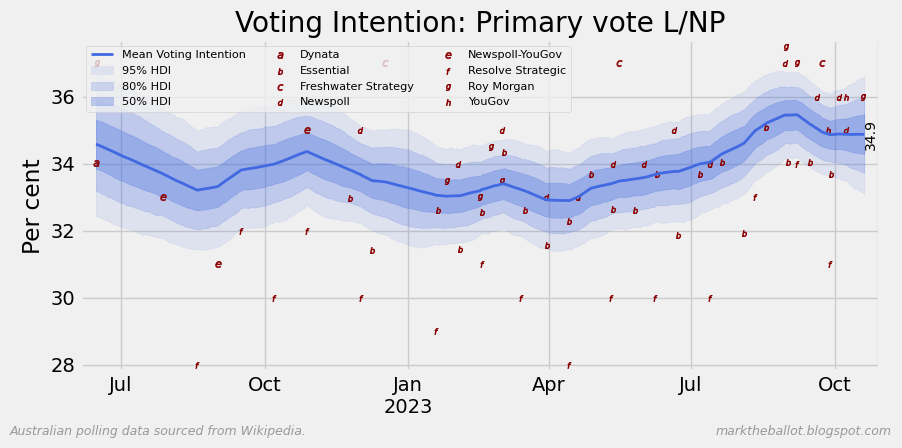

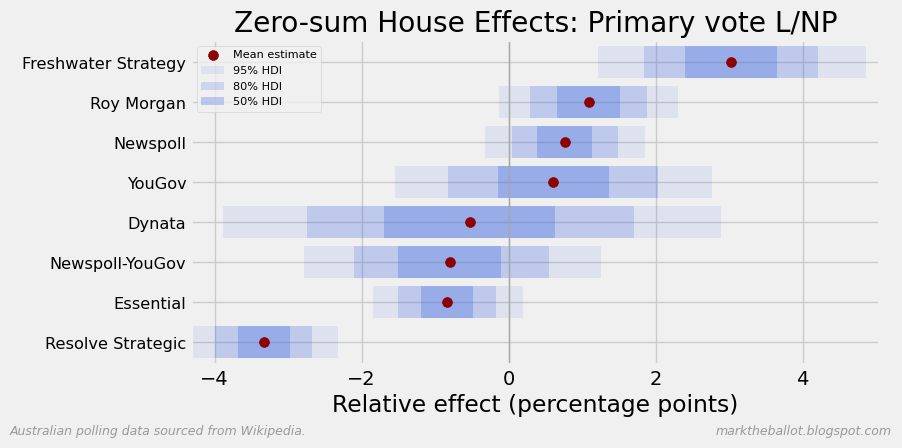

Series: Primary vote Other
Number of polls: 66
Number of days: 492
Number of pollsters: 8
Centre offset: -17.568631396880757



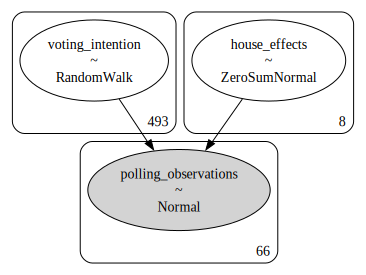

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (10 chains in 10 jobs)
NUTS: [voting_intention, house_effects]


Sampling 10 chains for 1_000 tune and 1_000 draw iterations (10_000 + 10_000 draws total) took 48 seconds.


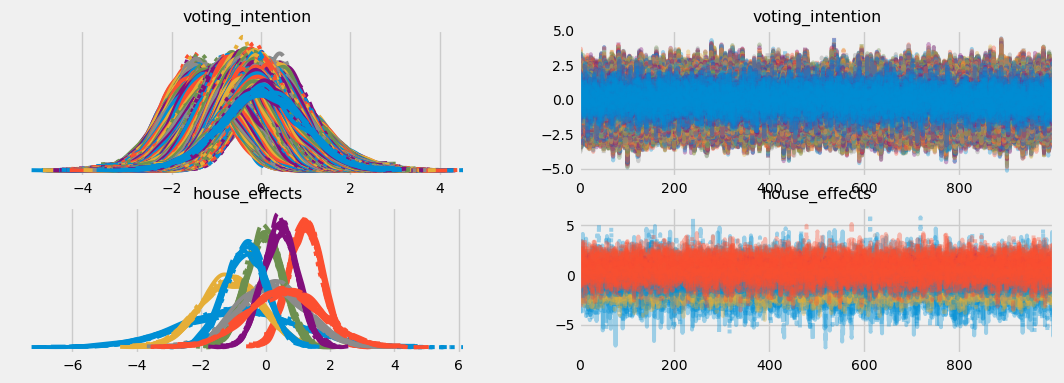

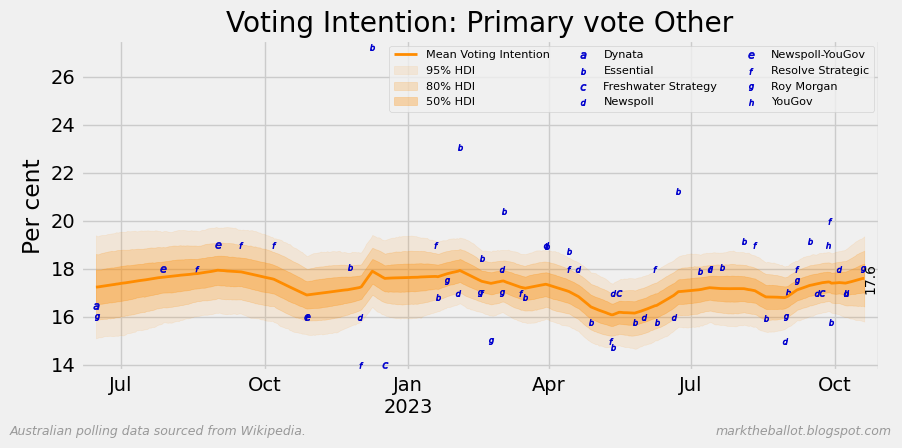

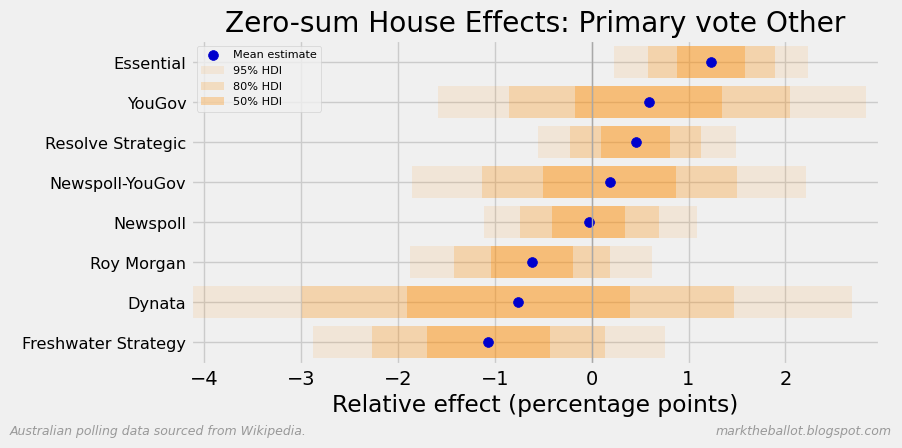

In [6]:
for column in chart:
    # Bayesian analysis ...
    (
        zero_centered_y,
        centre_offset,
        n_polls,
        n_days,
        day_zero,
        poll_day,
        poll_firm,
        firm_map,
        n_firms,
        measurement_error_sd,
    ) = bayes_tools.prepare_data_for_analysis(df, column)
    model = bayes_tools.define_zs_model(
        n_firms,
        n_days,
        poll_day,
        poll_firm,
        zero_centered_y,
        measurement_error_sd,
    )
    gv = pm.model_to_graphviz(model)
    gv.render(
        format="png", filename=f"{MODEL_DIR}model-graphviz-{column.replace('/', '')}"
    )
    display(gv)
    trace, summary = bayes_tools.draw_samples(model)

    # plotting ...
    line_color = plotting.get_color(column)
    point_color = plotting.contrast(line_color)
    bayes_tools.plot_aggregation(
        trace,
        df,
        column,
        day_zero,
        n_days,
        centre_offset,
        line_color=line_color,
        point_color=point_color,
        show=SHOW,
    )
    bayes_tools.plot_house_effects(
        trace, 
        column,
        brand_mapping=firm_map, 
        line_color=line_color,
        point_color=point_color,
        title=f'Zero-sum House Effects: {column}',
        show=SHOW,
    )

## Finished

In [7]:
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Thu Oct 26 2023 11:31:07

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

pymc      : 5.9.0
matplotlib: 3.8.0
pandas    : 2.1.1

Watermark: 2.4.3



In [8]:
print("Finished")

Finished
